Nome: Paloma Mirela dos Santos Rodrigues

RM: 551321

##Data Science - Visualização dos dados do Gapminder com scatter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_happiness = pd.read_csv('/content/hapiscore_whr.csv')
df_gdp = pd.read_csv('/content/gdp_pcap.csv')
df_population = pd.read_csv('/content/population.csv')
df_region = pd.read_csv('/content/regions.csv', delimiter='\t')

In [ ]:
countries_with_happiness_score = df_happiness['country'].unique()

In [ ]:
df_region['country'] = df_region['country;region'].str.split(';').str.get(0)
df_region['region'] = df_region['country;region'].str.split(';').str.get(1)

In [ ]:
df_gdp_filtered = df_gdp[df_gdp['country'].isin(countries_with_happiness_score)]
df_population_filtered = df_population[df_population['country'].isin(countries_with_happiness_score)]
df_region_filtered = df_region[df_region['country'].isin(countries_with_happiness_score)]


In [ ]:
year = '2020'

In [ ]:
df_gdp_year = df_gdp_filtered[['country', year]]
df_region_year = df_region_filtered
df_population_year = df_population_filtered[['country', year]]
df_happiness_year = df_happiness[['country', year]]

In [ ]:
df_gdp_year.columns = ['country', 'gdp']
df_population_year.columns = ['country', 'population']
df_happiness_year.columns = ['country', 'happiness_score']

In [ ]:
df = df_gdp_year.merge(df_region_year, on='country').merge(df_population_year, on='country').merge(df_happiness_year, on='country')
df = df[~df['happiness_score'].isna() & ~df['gdp'].isna()]

In [ ]:
def convert_population(population_string):
    if 'M' in population_string:
        return float(population_string.replace('M', '')) * 1000000
    elif 'k' in population_string:
        return float(population_string.replace('k', '')) * 1000
    elif 'B' in population_string:
        return float(population_string.replace('B', '')) * 1000000000
    else:
        return float(population_string)

In [ ]:
def convert_gdp_per_capita(gdp_string):
    try:
        if 'k' in gdp_string:
            return float(gdp_string.replace('k', '')) * 1000
        else:
            return float(gdp_string)
    except ValueError:
        return float(gdp_string)


In [ ]:
df['population'] = df['population'].apply(convert_population)

In [ ]:
df['gdp'] = df['gdp'].apply(convert_gdp_per_capita)
df['gdp'] = pd.to_numeric(df['gdp'])
df['happiness_score'] = df['happiness_score']
df['happiness_score'] = pd.to_numeric(df['happiness_score'])
population_size = df['population'].apply(convert_population)
region_color = pd.factorize(df['region'])[0]

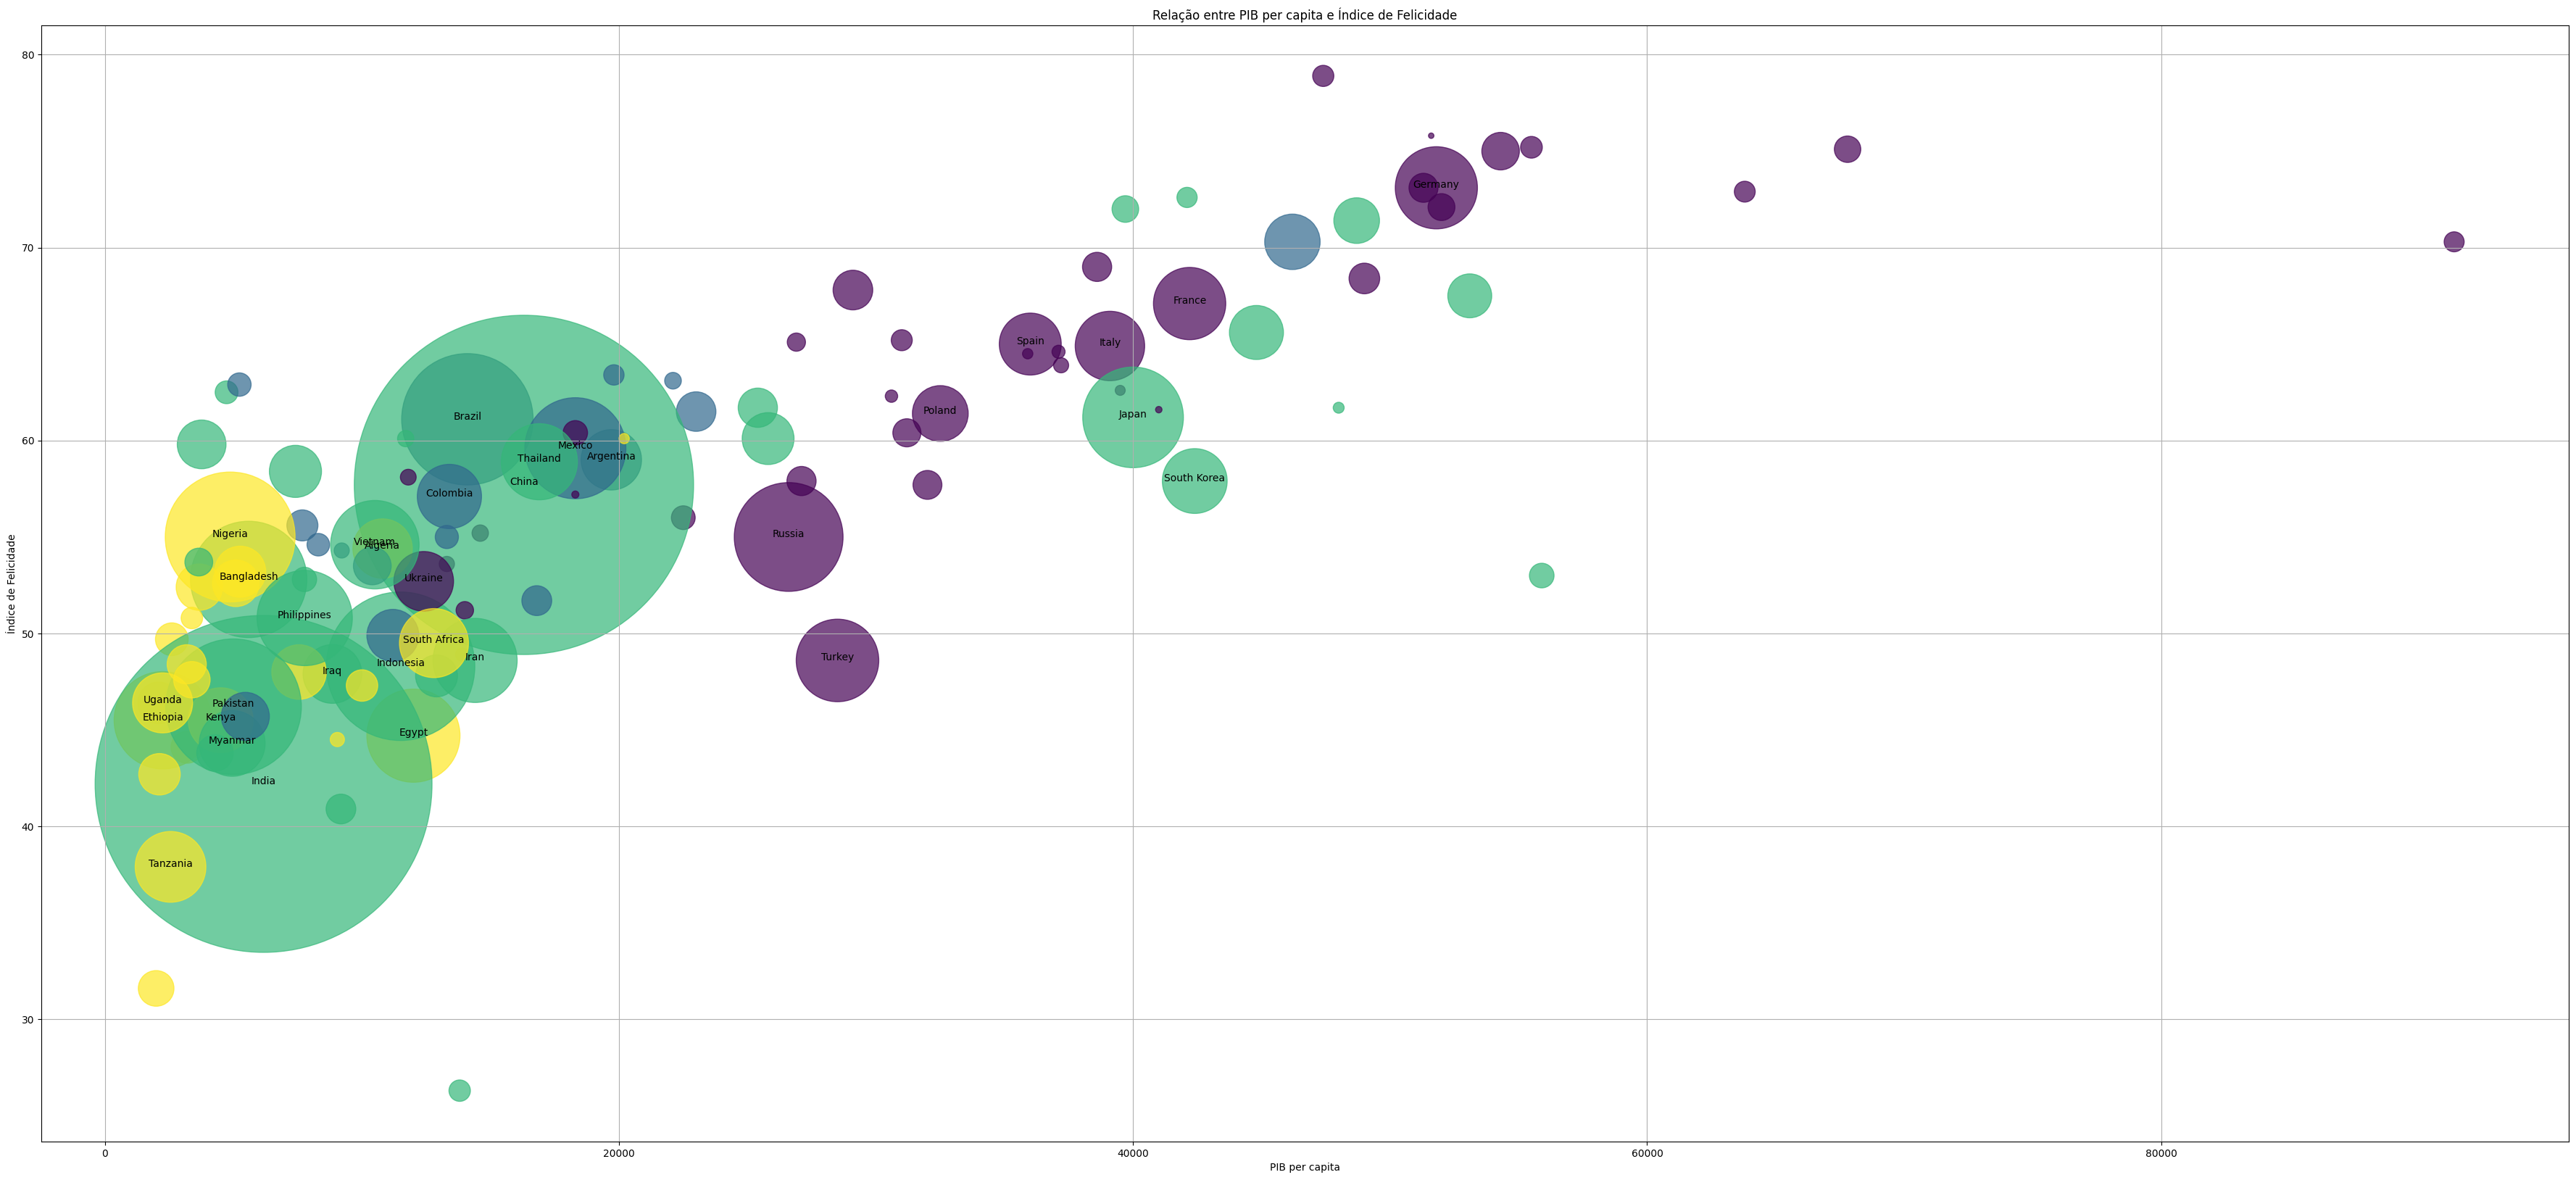

In [ ]:
region_colors = pd.factorize(df['region'])[0]

# Plot scatter plot
plt.figure(figsize=(45, 20))

# Scatter plot with population as bubble size
plt.scatter(df['gdp'],df['happiness_score'], s= population_size *0.00008, c=region_colors, cmap='viridis', alpha=0.7)

plt.xlabel('PIB per capita')
plt.ylabel('Índice de Felicidade')
plt.title('Relação entre PIB per capita e Índice de Felicidade')

for i, row in df.iterrows():
    country = row['country']
    gdp = row['gdp']
    happiness_score = row['happiness_score']
    population = row['population']  # População do país na iteração atual

    if row['population'] > 38000000:  # Verifica se a população é maior que 100 milhões
      plt.annotate(country, (gdp, happiness_score), textcoords="offset points", xytext=(0,0), ha='center')


# Show plot
plt.grid(True)

plt.show()